<a href="https://colab.research.google.com/github/CMDRZero/DataScienceFundamentalsClass/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, its only by comparing how different models do on a particular set of data that we can do a comparison. Otherwise its just some number.

**Task2**:

Describe overfitting, in the context of this course

Overfitting in the context of this course is the case of your model getting distracted by minute details that dont matter and finding erroneous correlations. If you look at enough data points you'll find correlations that dont exist. https://www.tylervigen.com/spurious-correlations

**Task3**:

How do we mitigate overfitting?

We can mitigate overfitting by creating DAGs and looking at causal relationships. Things which are caused by our thing shouldnt be included and things with very weak or dubious connections should be tested to see if its worth the effort.

We can also pick our priors to limit overfitting by using informed priors

**Task4**:

How do we mitigate underfitting?

We give our models more information, more data means more things it can use to leverage its informed guess.

**Task5**:

Why would we want more than one predictor in a model?

Because most real world phenomina are caused/influenced by multiple things it makes sense to have more predictors in our model.

**Task6**:

Can we have too many predictors? How would we now?

We might have too many predictors if our data is overfitting or making relationships which we know dont correlate with reality, for example, supposing that my grades are correlated to some guy in kazakhstans bank account value, that doesnt make sense, and we've given our model too many things.

**Task7**:

What is variable selection, and how does it work?

Variable selection is the process of picking and tuning our variables for our model. It starts with an informed set of variables based on observed reality and our knowledge, and may be tweaked automatically or manually by tools designed to find which variables help the predictor.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

The first feels quite arbitrary as you yourself are assigning the value of  the catgorical variable. This is similar to the others in that the first variable is solved in the context of the other variable preventing it from over fitting one categorical case.

The second case allows the predictor to learn the first variable in the context of a specific category, which means it will learn each case much more accurately, but find little correlation between the categories.

The third would again have a general trend encoded in the first variable, but would be freed from your opinions on what the second variable should encode as as the model would learn how to map the category to a variable.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We visualize multiple linear regression models by drawing each one on the same plane and showing each linear correlation.

With a multiple variable model we can show each predictors contribution, but we humans cannot easily visualize the full contribution as we are limtied to 3d.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import pandas as pd

In [2]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [4]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.2 MB/s eta 0:00:00


In [5]:
import bambi as bmb
import arviz as az
import numpy as np

In [6]:
model_cat = bmb.Model("FGp ~ FTp + Pos", data=bb); idata_cat = model_cat.fit(idata_kwargs={'log_likelihood': True})
model_heir = bmb.Model("FGp ~ FTp + Pos + (FTp|Pos)", data=bb); idata_heir = model_heir.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

Output()

Output()

ERROR:pymc.stats.convergence:There were 109 divergences after tuning. Increase `target_accept` or reparameterize.


In [7]:
model_intr = bmb.Model("FGp ~ FTp + Pos + (FTp:Pos)", data=bb); idata_intr = model_intr.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [8]:
model_3 = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos:`3PA`", data=bb); idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [9]:
model_pintr = bmb.Model("FGp ~ FTp + Pos + `3PA` + Pos:`3PA`", data=bb); idata_pintr = model_pintr.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [16]:
model_3o = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + `3PA`:Pos", data=bb); idata_3o = model_3o.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

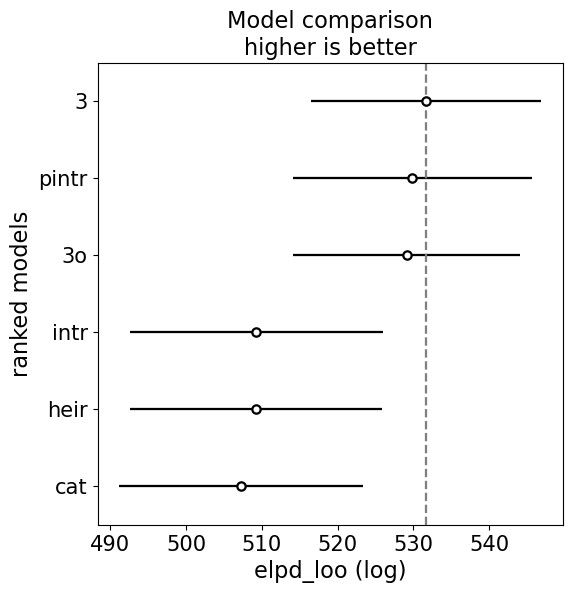

In [17]:
az.plot_compare(az.compare({'cat':idata_cat, 'heir':idata_heir, 'intr':idata_intr, '3': idata_3, 'pintr': idata_pintr, '3o': idata_3o}));

In [18]:
x = az.compare({'cat':idata_cat, 'heir':idata_heir, 'intr':idata_intr, '3': idata_3, 'pintr': idata_pintr, '3o': idata_3o});
x

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
3,0,531.721896,13.736846,0.000000,0.705874,15.184584,0.000000,False,log
pintr,1,529.884872,12.671630,1.837024,0.294126,15.826740,3.084329,False,log
3o,2,529.116314,19.073388,2.605582,0.000000,14.985077,1.789240,False,log
intr,3,509.289340,13.803427,22.432556,0.000000,16.722807,6.873526,False,log
heir,4,509.281492,13.407631,22.440404,0.000000,16.630475,6.772445,False,log
cat,5,507.223268,8.428906,24.498628,0.000000,16.128036,7.052611,False,log


In [19]:
x = az.compare({'cat':idata_cat, 'heir':idata_heir, 'intr':idata_intr, 'pintr': idata_pintr, '3o': idata_3o});
x

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
pintr,0,529.884872,12.671630,0.000000,5.636918e-01,15.826740,0.000000,False,log
3o,1,529.116314,19.073388,0.768558,4.363082e-01,14.985077,3.745204,False,log
intr,2,509.289340,13.803427,20.595532,2.163011e-15,16.722807,7.566732,False,log
heir,3,509.281492,13.407631,20.603380,1.844480e-15,16.630475,7.371921,False,log
cat,4,507.223268,8.428906,22.661604,0.000000e+00,16.128036,6.817649,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to this metric, our heirarchical model is doing much better than any of the models incorperating interactions. If I had to guess this is because in the simple heirarchical model the model can easier taylor the lines to solve each category rather than trying to find some linear relationship.